# Hands-on experience on the exponential pdf

## Sampling from an exponential distribution

Let's begin by remebering that the exponential probability density function is


$$
p(x;\lambda)=\lambda e^{-\lambda x}
$$

or, alternatively,

$$
p(x;\theta)=\frac{1}{\theta} e^{\textstyle{-\frac{x}{\theta}}}.
$$

We can randomly extract from the said distribution $N=100000$ times, using $\lambda=1\;(=\theta)$

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
if IN_COLAB:
    !pip install zfit

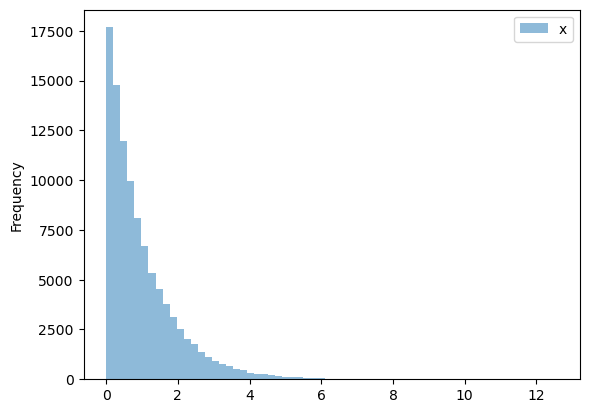

In [2]:
N = 100000
df = pd.DataFrame({'x':np.random.exponential(scale= 1, size=N)})
ax = df.plot.hist(bins=64, alpha=0.5)

We can calculate the sample mean and variance<br>
$$
\overline{x}=\frac{1}{N}\sum_{i=1}^{N}x_i\qquad s^2=\frac{1}{N-1}\sum_{i=1}^{N}\left(x_i-\overline{x}\right)^2
$$

In [3]:
mean = df.mean()[0]
print(f'The sample mean value is {mean}')

The sample mean value is 1.0038986762973086


In [4]:
var = df.var()[0]
print(f'The sample variance value is {var}')

The sample variance value is 1.0074173912551103


## The likelihood function

Given $N$ samples extracted from an exponential distribution, the likelihood function is

$$
\mathcal{L}(\lambda; x) = \prod_{i=1}^{N} \lambda e^{-\lambda x_i}.
$$


The MLE exstimator for $\lambda$ can be extracted from

$$
\log\left(\mathcal{L}\right) = N\log(\lambda) - \sum_{i=1}^N x_i,\quad \textrm{by imposing} \quad\frac{\partial\log(\mathcal{L})}{\partial\lambda} = 0,
$$

which returns the result of
$$
\hat{\lambda}_{MLE}=\frac{N}{\sum_{i=1}^N x_i}.
$$
Here we can see how the likelihood shape and $\hat{\lambda}_{MLE}$ change as $N$ increases.

lambda_mle (N = 1) = 2.565
lambda_mle (N = 2) = 2.198
lambda_mle (N = 5) = 1.096
lambda_mle (N = 11) = 1.034
lambda_mle (N = 15) = 1.162
lambda_mle (N = 30) = 1.147
lambda_mle (N = 50) = 1.181
lambda_mle (N = 100) = 1.201
lambda_mle (N = 300) = 0.955


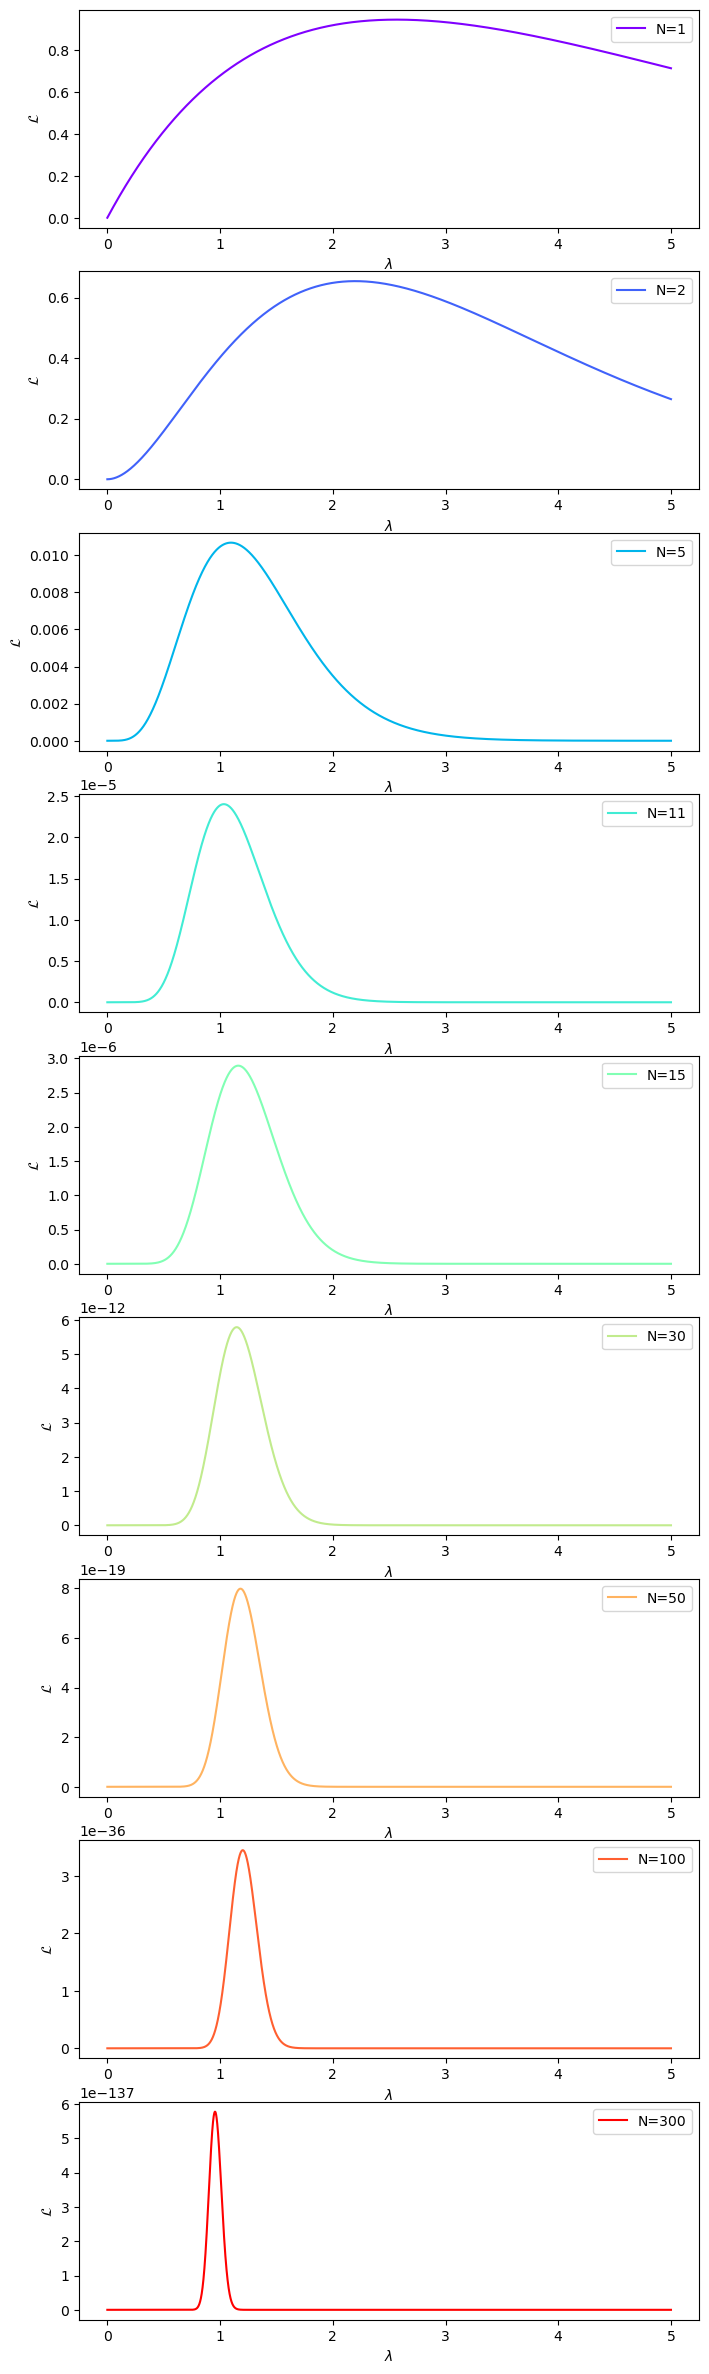

In [5]:
l = np.linspace(0,5,10000)
n_samples = [1,2,5,11,15,30,50,100,300,]
plt.figure(figsize=(8, 30))
color = plt.cm.rainbow(np.linspace(0, 1, len(n_samples)))
for n in n_samples:
    y = 1
    for i in range(n):
        y *= l * np.exp(-l * df.values[i][0])
    lambda_mle = n / df.iloc[0:n].sum()[0]
    plt.subplot(len(n_samples), 1, n_samples.index(n)+1)
    plt.xlabel("$\lambda$")
    plt.ylabel("$\mathcal{L}$")
    plt.plot(l, y, label=f'N={n}', c=color[n_samples.index(n)])
    plt.legend()
    print(f'lambda_mle (N = {n}) = {lambda_mle:.3f}')

The $MLE$ for $\lambda$ however is a biased estimator as it can be proven that

$$
E\left[\hat{\lambda}_{MLE}-\lambda\right]= E\left[\hat{\lambda}_{MLE}-\frac{N}{\sum_{i=1}^N x_i}\right]=\frac{\lambda}{N-1},
$$

however a simple transformation $\hat{\lambda}_{MLE}\rightarrow\frac{N-1}{N}\hat{\lambda}_{MLE}$ will give us an unbiased estimator as $E\left[\frac{N-1}{N}\hat{\lambda}_{MLE}-\lambda\right] = 0$.


Also with non-linear transformation $\lambda\rightarrow\frac{1}{\theta}$, we can reparemetrize the likelihhod as

$$
\mathcal{L}(\lambda; x) = \prod_{i=1}^{N} \frac{1}{\theta} e^{\textstyle - \frac{x_i}{\theta}}.
$$

Then by maximising $\log(\mathcal{L})$, it can be found that
$$
\hat{\theta}_{MLE}=\frac{\sum_{i=1}^N x_i}{N},
$$

which is unbiased as $E\left[\hat{\theta}_{MLE}-\theta\right] = 0$.

theta_mle (N = 1) = 0.390
theta_mle (N = 2) = 0.455
theta_mle (N = 5) = 0.912
theta_mle (N = 11) = 0.968
theta_mle (N = 15) = 0.861
theta_mle (N = 30) = 0.872
theta_mle (N = 50) = 0.847
theta_mle (N = 100) = 0.832
theta_mle (N = 300) = 1.047


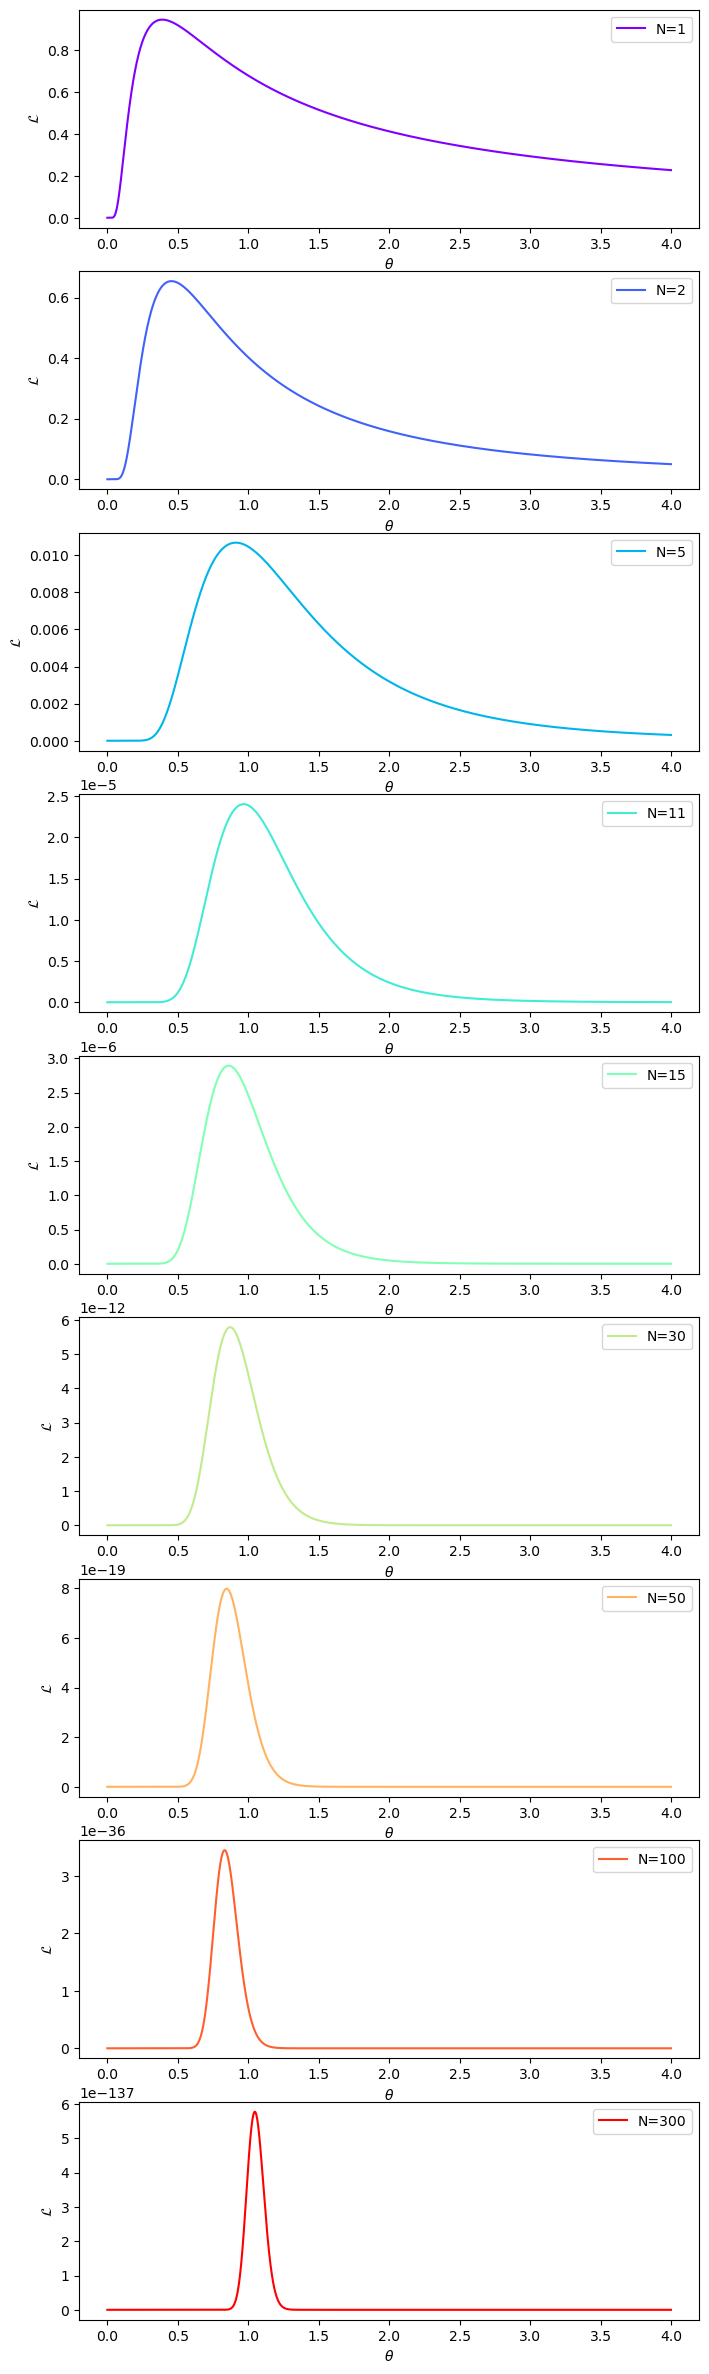

In [6]:
t = np.linspace(0.000001,4,10000)
n_samples_t = [1,2,5,11,15,30,50,100,300,]
plt.figure(figsize=(8, 30))
color_t = plt.cm.rainbow(np.linspace(0, 1, len(n_samples)))
for n in n_samples_t:
    y_t = 1
    for i in range(n):
        y_t *= 1/t*np.exp(-df.values[i][0]/t)
    theta_mle = df.iloc[0:n].sum()[0]/n
    plt.subplot(len(n_samples_t), 1, n_samples_t.index(n)+1)
    plt.xlabel("$\\theta$")
    plt.ylabel("$\mathcal{L}$")
    plt.plot(t, y_t, label=f'N={n}', c=color[n_samples_t.index(n)])
    plt.legend()
    print(f'theta_mle (N = {n}) = {theta_mle:.3f}')

# Score and Fisher's information

The score, whis is defined as the gradient of the log-likelihood function with respect the parameters' vector, is for an exponential distribution

$$
F(\lambda)=\frac{\partial \log\mathcal{L(\lambda)}}{\partial \lambda}=\frac{N}{\lambda}-\sum_{x=1}^N x_{i}
$$

We can see it as function of $\lambda$ for various values of N.

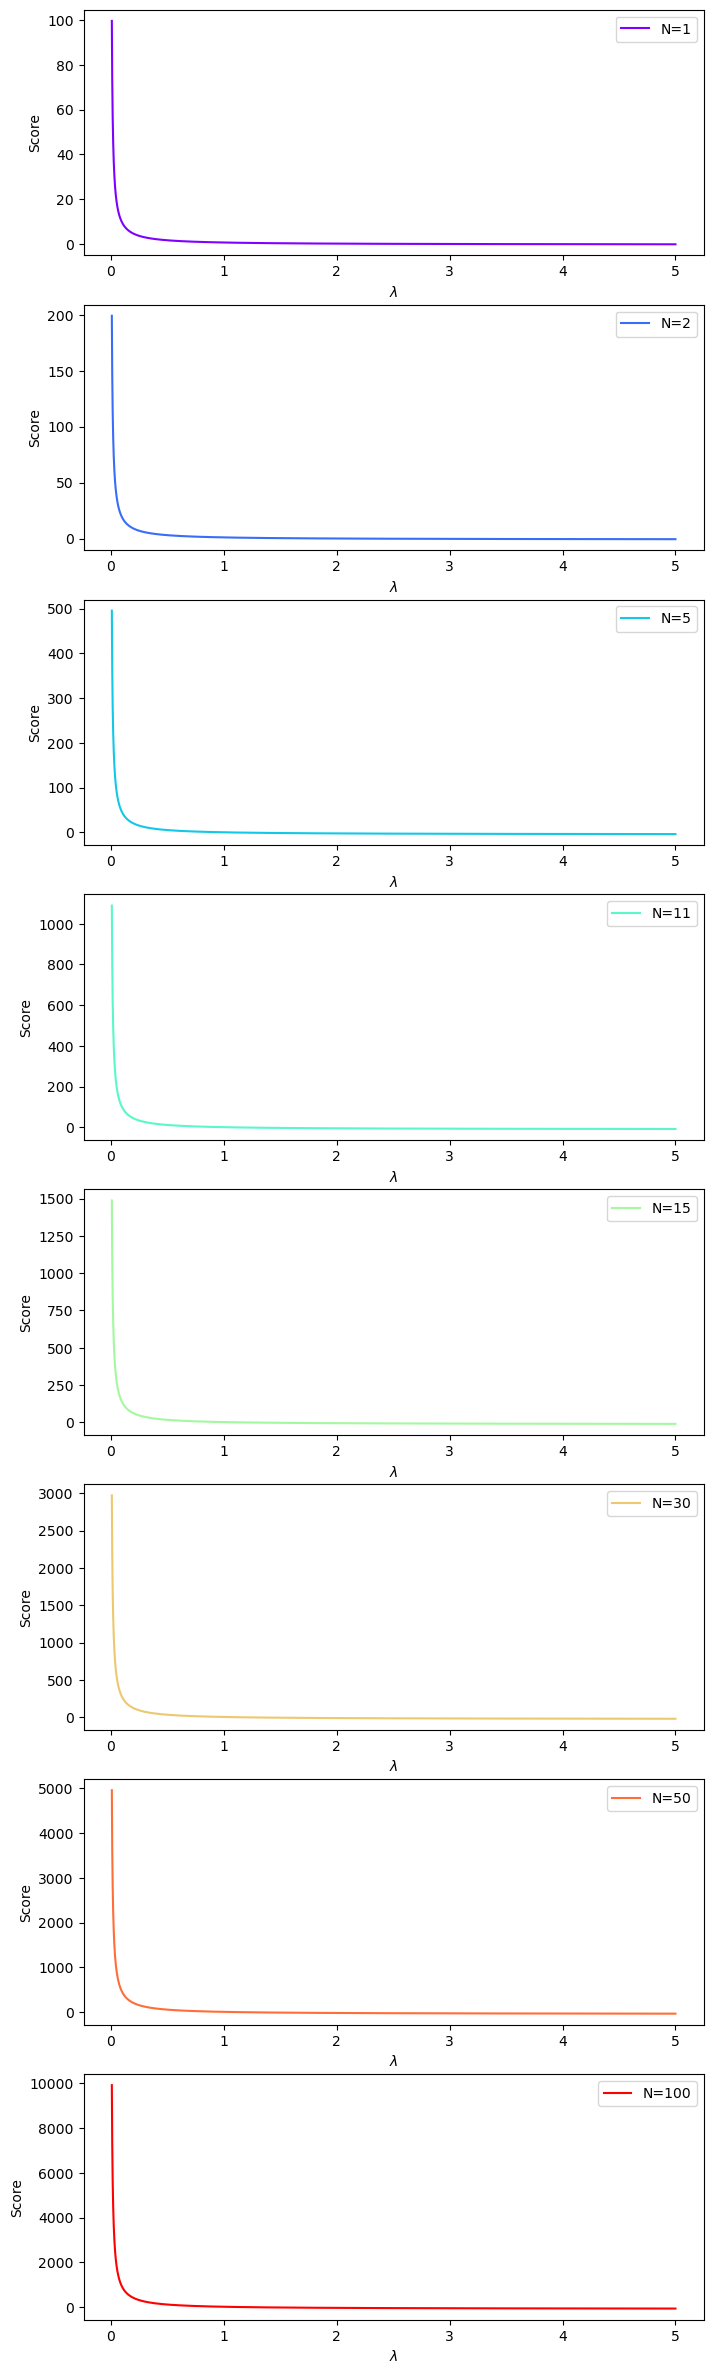

In [7]:
l = np.linspace(0.01,5,10000)
n_samples = [1,2,5,11,15,30,50,100,]
plt.figure(figsize=(8, 30))
color = plt.cm.rainbow(np.linspace(0, 1, len(n_samples)))
for n in n_samples:
    y = n/l - df.iloc[0:n].sum()[0]
    plt.subplot(len(n_samples), 1, n_samples.index(n)+1)
    plt.xlabel("$\lambda$")
    plt.ylabel("Score")
    plt.plot(l, y, label=f'N={n}', c=color[n_samples.index(n)])
    plt.legend()

The expected value of the __score__ over the sample space, given $\lambda$, is

$$
E\left[F(x|\lambda)\right] = 0
$$

as we can see below where the distribution of the Score value, computed entry by entry, is plotted.

The Score mean value is -0.0039


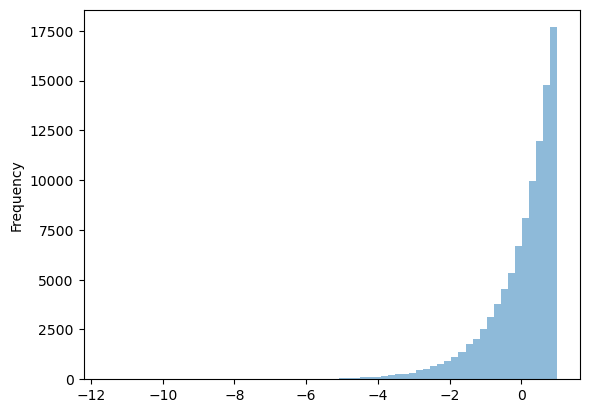

In [8]:
df2 = df 
df2["Score"] = 1 - df2["x"]
ax_score = df2["Score"].plot.hist(bins=64, alpha=0.5)
mean_score = df2.mean()[1]
print(f'The Score mean value is {mean_score:.2}')

From the variance of the Score function the Fisher's information is defined

$$
\mathcal{I}(\lambda)=E\left[F(x;\lambda)^2\right] =E\left[\left( \frac{\partial \log\mathcal{L(x;\lambda)}}{\partial \lambda}\right)^2\right].
$$

The exponential distribution satisfies the regularity conditions and is twice differentiable, therefore its fisher information can be written as

$$
\mathcal{I}(\lambda)= -E\left[ \frac{\partial^2 \log\mathcal{L(x;\lambda)}}{\partial \lambda^2}\right]=\frac{N}{\lambda^2}.
$$

It can be seen how the Fisher's information respects addictivity w.r.t. $N$.

With the Fisher's information we can consider the Cramer-Rao bound, which states that for
- unbiased estimator of the parameter $\vartheta$

$$
\sigma^2(\hat{\vartheta})\geq\frac{1}{\mathcal{I}(\vartheta)}
$$

- biased estimator of the parameter $\vartheta$

$$
\sigma^2(\hat{\vartheta})\geq\frac{[1+b'(\vartheta)]^2}{\mathcal{I}(\vartheta)},
$$
with $b'(\vartheta)$ being the first derivative w.r.t. $\vartheta$ of the bias on the estimator $\hat{\vartheta}$.


REMEMBER: MLEs reach the minimum of the Cramer-Rao bound, for it is efficient!!!


In case of our exponential distribution we can see that we have

- for $\hat{\lambda}_{MLE}$, where $b=\frac{\lambda}{N-1}$

$$
\sigma^2(\hat{\lambda}_{MLE})=\frac{\left[\frac{N}{N-1}\right]^2}{\frac{N}{\lambda^2}}=\frac{N}{\left(N-1\right)^2}\lambda^2 \xrightarrow[]{N \to \infty} \frac{\lambda^2}{N}
$$

- for $\hat{\theta}_{MLE}$, which is unbiased

$$
\sigma^2(\hat{\theta}_{MLE})=\frac{\theta^2}{N},
$$

In [9]:
ZFIT_DISABLE_TF_WARNINGS=1
import zfit

obs = zfit.Space('x', (0, 100))
data = zfit.Data.from_pandas(df, obs=obs)
lambda_var = zfit.Parameter('Lambda', -1.4, -100, 0, step_size=0.2)

/usr/local/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/usr/local/anaconda3/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [10]:
expo = zfit.pdf.Exponential(obs=obs, lam=lambda_var)
nll_expo = zfit.loss.UnbinnedNLL(expo, data)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll_expo)
result.errors(method='minuit_minos')
print(result.info['minuit'])

/usr/local/anaconda3/lib/python3.10/site-packages/zfit/minimizers/fitresult.py:1337: ChangedFeatureWarning: The behavior of this functionality recently changed.To turn this warning off, use `zfit.settings.changed_warnings.errors_name = False`  or 'all' with `zfit.settings.changed_warnings.all = False
Default name of errors (which is currently the method name such as `minuit_minos`or `zfit_errors`) has changed to `errors`. Old names are still added as well for compatibility but will be removed in the future. INSTRUCTIONS: to stay compatible, change wherever you access the error to 'errors' or specify the name explicitly in errors(...).
  warn_changed_feature(message, "errors_name")


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -5509                      │              Nfcn = 20               │
│ EDM = 1.37e-06 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬────

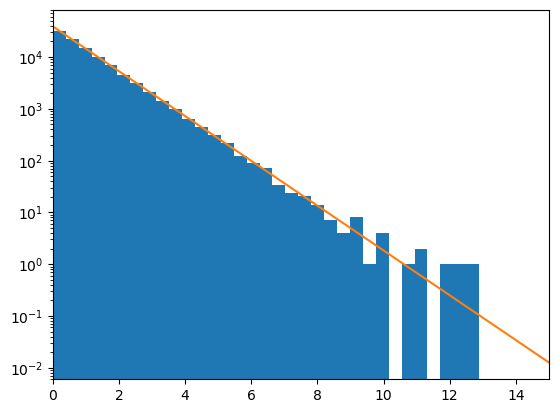

In [11]:
lam = np.linspace(0,15,100000)
y = expo.pdf(lam) * 100000 / 256 * data.data_range.area()
data_plot = data.value()[:, 0] 
plt.hist(data_plot, bins=256, range=(0, 100))
plt.yscale('log')
plt.xlim([0, 15])
plt.plot(lam, y)

Is the extracted value sensible?

How does its uncertainty compare with the Cramer-Rao bound?

Let's repeat woth fewer samples...

In [12]:
n_samples_fit = [2,5,20,120,1000,10000,]
for n in n_samples_fit:
    data = zfit.Data.from_pandas(df.head(n), obs=obs)
    nll_expo = zfit.loss.UnbinnedNLL(expo, data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll_expo)
    print(f'===============================\nFit {n} Entries')
    print(result.info['minuit'])
    print(f'sqrt(MVB) is {n**0.5/((n-1)):.3}')

Fit 2 Entries
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 999.5                      │              Nfcn = 15               │
│ EDM = 0.000255 (Goal: 0.001)     │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬

└────────┴──────────┘
sqrt(MVB) is 0.01


# Binned samples


In [16]:
bins = [16,32,64,128,256,]
for binn in bins:
    binning = zfit.binned.RegularBinning(binn, 0, 100, name="x")
    obs_bin = zfit.Space("x", binning=binning)
    
    data_binned = data.to_binned(obs_bin)
    expo_binned = zfit.pdf.BinnedFromUnbinnedPDF(expo, obs_bin)
    loss_binned = zfit.loss.BinnedNLL(expo_binned, data_binned)
    result_binned = minimizer.minimize(loss_binned)
    result_binned.errors(method='minuit_minos')
    print(f'===============================\nFit {binn} bins')
    print(result_binned.info['minuit'])

Fit 16 bins
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.475                      │              Nfcn = 17               │
│ EDM = 5.54e-05 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬──

└────────┴──────────┘


# Truncated exponential from above

In [23]:
upper_limits = [50, 25, 10, 5, 2, 1, 0.5,]
for upper in upper_limits:
    obs_lim = zfit.Space('x', (0, upper))
    data = zfit.Data.from_pandas(df, obs=obs_lim)
    nll_expo = zfit.loss.UnbinnedNLL(expo, data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll_expo)
    result.errors(method='minuit_minos')
    print(f'===============================\nUpper limit is {upper}')
    print(result.info['minuit'])

Upper limit is 50
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.322e+05                 │              Nfcn = 30               │
│ EDM = 4.67e-08 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬──────

└────────┴──────────┘
Upper limit is 1
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -5678                      │              Nfcn = 21               │
│ EDM = 1.03e-07 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬───────────

# Truncated exponential from below

In [25]:
lower_limits = [0.5, 1, 2, 4, 8, 16,]
for lower in lower_limits:
    obs_lim = zfit.Space('x', (lower, 100))
    data = zfit.Data.from_pandas(df, obs=obs_lim)
    nll_expo = zfit.loss.UnbinnedNLL(expo, data)
    minimizer = zfit.minimize.Minuit()
    result = minimizer.minimize(nll_expo)
    result.errors(method='minuit_minos')
    print(f'===============================\nLower limit is {lower}')
    print(result.info['minuit'])

Lower limit is 0.5
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -5.864e+04                 │              Nfcn = 27               │
│ EDM = 4.08e-07 (Goal: 0.001)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────

└────────┴──────────┘


/usr/local/anaconda3/lib/python3.10/site-packages/zfit/minimizers/fitresult.py:1087: RuntimeWarning: Exception occurred, parameter values are not reset and in an arbitrary, last used state. If this happens during normal operation, make sure you reset the values.
  warnings.warn(


RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=0.0 edm_goal=0.001 errordef=0.5 fval=-0.0 has_accurate_covar=False has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=False has_reached_call_limit=False has_valid_parameters=False hesse_failed=True is_above_max_edm=False is_valid=False nfcn=76 ngrad=0 reduced_chi2=nan time=0.13301201800004492>